In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cvxpy as cvx
import warnings

In [91]:
# LP example1

from cvxopt import matrix, solvers

A = matrix([ [2.0, 1.0, -1.0, 0.0], [1.0, 2.0, 0.0 ,-1.0] ] )
b = matrix([ 29.0, 25.0, -2.0, -5.0 ])
f = matrix([ -1.0, -1.0 ])

sol = solvers.lp(f,A,b)

print(sol['x'])

     pcost       dcost       gap    pres   dres   k/t
 0: -1.6900e+01 -1.6900e+01  6e+00  4e-01  8e-17  1e+00
 1: -1.1396e+01 -1.0772e+01  1e+01  4e-01  5e-16  2e+00
 2: -7.5435e+00 -7.1838e+00  2e+00  6e-02  5e-16  5e-01
 3: -7.0058e+00 -7.0019e+00  2e-02  6e-04  2e-16  5e-03
 4: -7.0001e+00 -7.0000e+00  2e-04  6e-06  1e-16  5e-05
 5: -7.0000e+00 -7.0000e+00  2e-06  6e-08  9e-17  5e-07
Optimal solution found.
[ 2.00e+00]
[ 5.00e+00]



In [124]:
# LP example2

f = np.array([[1, 1]])
A = np.array([[2, 1], [1, 2]])
b = np.array([[29], [25]])
lb = np.array([[2], [5]])



x = cvx.Variable(2,1)

objective = cvx.Maximize(f*x)
constraints = [A*x <= b, lb <= x]
prob = cvx.Problem(objective, constraints)
result = prob.solve()

print (x.value)
print (result)

[[ 11.]
 [  7.]]
17.9999999986


In [137]:
f = np.array([[3], [4]])
H = np.array([[1, 0], [0, 0]])
A = np.array([[-1, -3], [2, 5], [3, 4]])
b = np.array([[-15], [100], [80]])
LB = np.array([[0], [0]])

x = cvx.Variable(2, 1)
objective = cvx.Minimize((1/2)*x.T*H*x + f.T*x)
constraints = [A*x <= b, x >= LB]
prob = cvx.Problem(objective, constraints)
prob.solve()


print(x.value)
print(prob.solve())

[[  1.33066240e-08]
 [  5.00000000e+00]]
20.0000000257


In [141]:

f = np.array([[3], [4]])
H = np.array([[1, 0], [0, 0]])
A = np.array([[-1, -3], [2, 5], [3, 4]])
b = np.array([[-15], [100], [80]])
LB = np.array([[0], [0]])

x = cvx.Variable(2)
objective = cvx.Minimize(cvx.quad_form(x, H) + f.T*x)
constraints = [A*x <= b, x >= LB]
prob = cvx.Problem(objective, constraints)
result = prob.solve()

print(x.value)
print(result)

[[  2.18959599e-09]
 [  5.00000000e+00]]
20.0000000046


Another example

In [150]:
x = cvx.Variable(2,1)

objective = cvx.Minimize(-3*x[0] - (1.5)*x[1])
constraints = [-1 <= x[0], 0 <= x[1], x[0] <= 2, x[1] <= 3]
prob = cvx.Problem(objective, constraints)
result = prob.solve()

print(x.value)
print(prob.solve())

[[ 1.99999999]
 [ 2.99999999]]
-10.4999999664


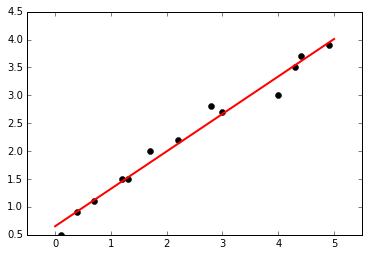

In [163]:
%matplotlib inline
x = np.array([[0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]]).transpose()
y = np.array([[0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]]).transpose()


m = y.shape[0]
A = np.concatenate((x,np.ones((m,1))),1)


theta = cvx.Variable(A.shape[1])
objective = cvx.Minimize(cvx.norm2(A*theta - y))
constraints = []
prob = cvx.Problem(objective, constraints)
result = prob.solve()




xp = np.linspace(0, 5, 500)
yp = theta[0].value*xp + theta[1].value

plt.plot(x, y, 'ko')
plt.plot(xp, yp, 'r-', linewidth = 2)
plt.axis('equal')
plt.show()

Best location at a concert

In [5]:
H = np.array([[2, 0], [0, 2]])
f = -np.array([[6], [6]])
A = np.array([[1, 1]])
b = 3
LB = np.array([[0], [0]])

x = cvx.Variable(2)
objective = cvx.Minimize(0.5*cvx.quad_form(x,H) + f.T*x + 18)
constraints = [A*x <= b, x >= LB]
prob = cvx.Problem(objective, constraints)
result = prob.solve()

print(x.value)
print(result)

[[ 1.5]
 [ 1.5]]
4.49999997512


In [173]:
pt1 = np.array([[0], [2]])
pt2 = np.array([[4], [1]])
mu = 1

x = cvx.Variable(2)


objective = cvx.Minimize(cvx.norm2(x - pt1) + mu*cvx.norm2(x - pt2))
constraints = [x[1] == 0]
prob = cvx.Problem(objective, constraints)
result = prob.solve()
x.value
print(result , x.value)

(4.9999999941297375, matrix([[  2.66674886e+00],
        [  5.87099733e-12]]))


In [175]:
A = np.array([[np.sqrt(3)], [0]])
B = np.array([[-np.sqrt(3)], [0]])
C = np.array([[0], [3]])

x = cvx.Variable(2)
objective = cvx.Minimize(cvx.norm(x-A, 2) + cvx.norm(x-B, 2) + cvx.norm(x-C, 2))
constraints = []
prob = cvx.Problem(objective, constraints)
result = prob.solve()

print(x.value, result)


(matrix([[ -1.58674964e-16],
        [  1.00000001e+00]]), 5.99999996302301)
